In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [8]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='iex', start='2015-1-1')['close']

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1511 non-null   float64
 1   MSFT    1510 non-null   float64
 2   F       1511 non-null   float64
 3   GE      1511 non-null   float64
dtypes: float64(4)
memory usage: 59.0+ KB


In [10]:
mydata.head()

,PG,MSFT,F,GE
date,,,,
2015-01-02,90.44,46.760,15.36,24.1061
2015-01-05,90.01,46.325,14.76,23.6636
2015-01-06,89.60,45.650,14.62,23.1538
2015-01-07,90.07,46.230,15.04,23.1634
2015-01-08,91.10,47.590,15.42,23.4424


In [11]:
mydata.tail()

,PG,MSFT,F,GE
date,,,,
2020-12-24,137.72,222.75,8.86,10.65
2020-12-28,138.68,224.96,8.89,10.64
2020-12-29,138.42,224.15,8.82,10.56
2020-12-30,137.77,221.68,8.86,10.71
2020-12-31,139.14,222.42,8.79,10.80


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [12]:
mydata.iloc[0]

PG      90.4400
MSFT    46.7600
F       15.3600
GE      24.1061
Name: 2015-01-02, dtype: float64

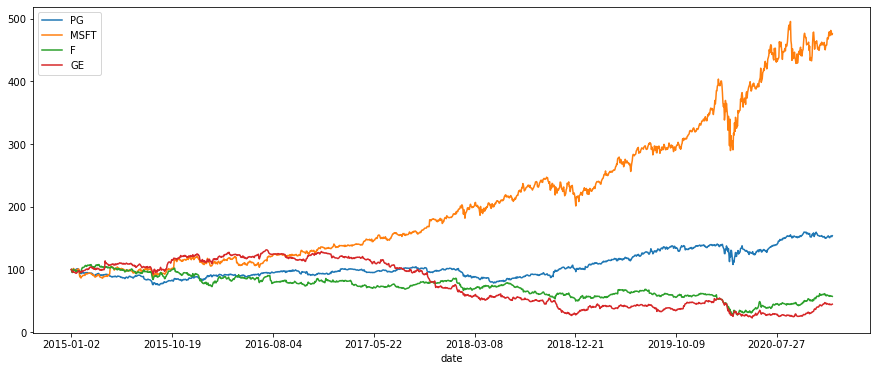

In [13]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

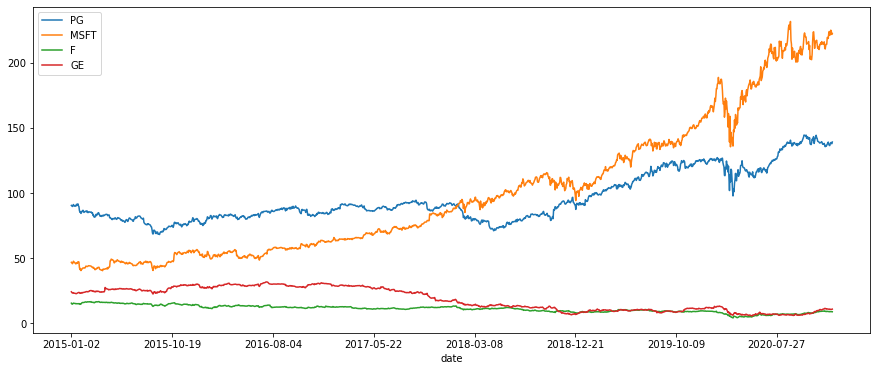

In [14]:
mydata.plot(figsize=(15,6))
plt.show()

In [17]:
mydata.loc['2015-01-02']

PG      90.4400
MSFT    46.7600
F       15.3600
GE      24.1061
Name: 2015-01-02, dtype: float64

In [18]:
mydata.iloc[0]

PG      90.4400
MSFT    46.7600
F       15.3600
GE      24.1061
Name: 2015-01-02, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [19]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.004755,-0.009303,-0.039062,-0.018356
2015-01-06,-0.004555,-0.014571,-0.009485,-0.021544
2015-01-07,0.005246,0.012705,0.028728,0.000415
2015-01-08,0.011436,0.029418,0.025266,0.012045


In [20]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [21]:
np.dot(returns, weights)

array([        nan, -0.01786905, -0.01253869, ..., -0.00521707,
        0.00075611,  0.00344623])

***

In [22]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.090344
MSFT    0.296757
F      -0.041465
GE     -0.063160
dtype: float64

In [23]:
np.dot(annual_returns, weights)

0.07061893410252974

In [26]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

7.062 %


***

In [27]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [29]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

7.062 %
14.546000000000001 %
